In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [2]:
src = "results"
fname = "shock_table_size{}.csv"

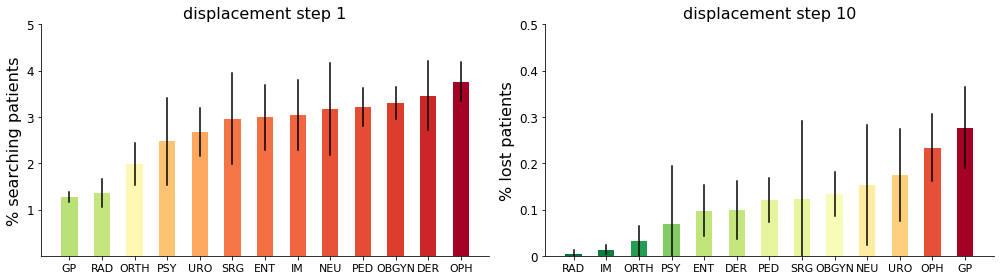

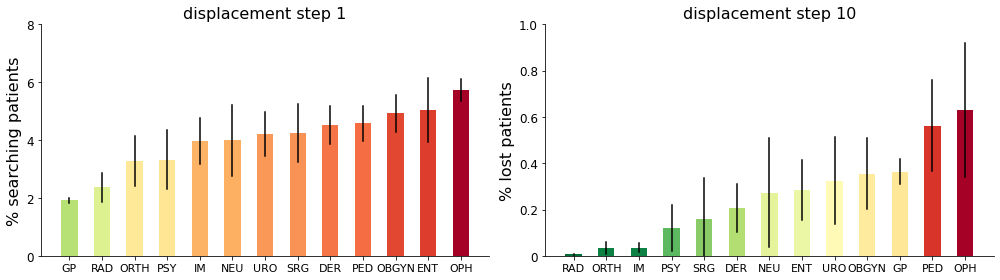

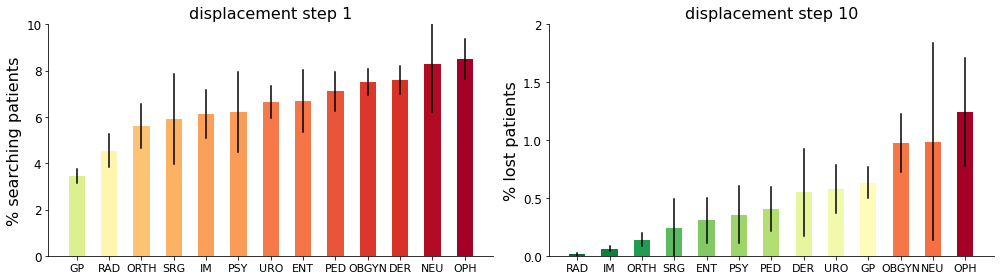

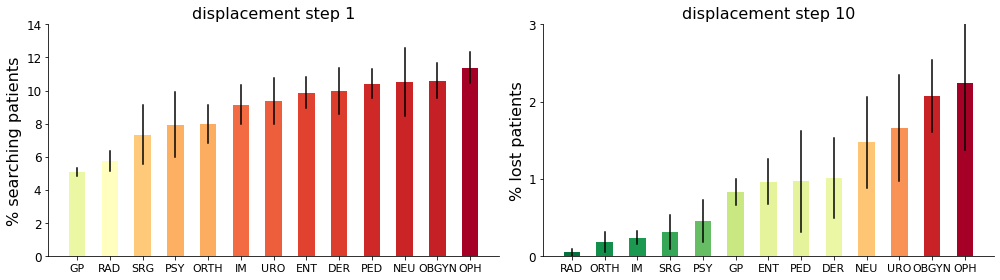

In [6]:
ylims = {7:[5, 0.5], 10:[8, 1], 15:[10, 2], 20:[14, 3]}
yticks_t1 = {
    7:[1, 2, 3, 4, 5], 
    10:[0, 2, 4, 6, 8], 
    15:[0, 2, 4, 6, 8, 10], 
    20:[0, 2, 4, 6, 8, 10, 12, 14]}
yticks_t10 = {
    7:[0, 0.1, 0.2, 0.3, 0.4, 0.5],
    10:[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
    15:[0., 0.5, 1.0, 1.5, 2],
    20:[0, 1, 2, 3]
}
ylabels = {0: "% searching patients",
           9: "% lost patients"}

for shock_size in [7, 10, 15, 20]:
    df = pd.read_csv(join(src, fname.format(shock_size)))
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    cmap = plt.get_cmap("RdYlGn_r")
    N = len(df)
    x = np.arange(N)  
    width = 0.5

    for i, step in enumerate([0, 9]):
        mean = f"step{step}_mean_perc"
        std = f"step{step}_std_perc"
        ax = axes[i]
        df = df.sort_values(by=[mean]).reset_index(drop=True)
        colors = [cmap(lost/df[mean].max()) for lost in df[mean]]
        labels = df["specialty"]
        ax.bar(x, df[mean], width, color=colors)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, fontsize=11)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel(ylabels[step], fontsize=16)
        ax.set_title(f"displacement step {step+1}", fontsize=16)


        for xpos in x:
            mean_val = df.loc[xpos, mean]
            std_val = df.loc[xpos, std]
            ax.plot([xpos, xpos], [mean_val - std_val, mean_val + std_val], 
                    color="k")

    axes[0].set_ylim(0, ylims[shock_size][0])
    axes[0].set_yticks(yticks_t1[shock_size])
    axes[0].set_yticklabels(yticks_t1[shock_size], fontsize=12)
    axes[1].set_ylim(0, ylims[shock_size][1])
    axes[1].set_yticks(yticks_t10[shock_size])
    axes[1].set_yticklabels(yticks_t10[shock_size], fontsize=12)
    fig.tight_layout()
    plt.savefig(f"figures/shock_results_{shock_size}.svg")